In [2]:
import tiffile as tf
from skimage.measure import regionprops_table
from napari import Viewer
import pandas as pd

In [3]:
data = tf.imread("/home/aaristov/Downloads/Dafne.tif")

In [4]:
data.shape

(9, 4, 1024, 1024)

In [5]:
red, green, dapi, labels = [data[:,i] for i in range(4)]

In [6]:
red_props = pd.DataFrame(regionprops_table(labels, intensity_image=red,properties=["bbox","label","mean_intensity", ]))
red_props = red_props.rename(columns={"mean_intensity": "red_intensity"})
green_props = pd.DataFrame(regionprops_table(labels, intensity_image=green, properties=["mean_intensity", ]))
green_props = green_props.rename(columns={"mean_intensity": "green_intensity"})


In [7]:
data_props = pd.concat([red_props, green_props], axis=1)

In [8]:
data_props

,bbox-0,bbox-1,bbox-2,bbox-3,bbox-4,bbox-5,label,red_intensity,green_intensity
0,1,235,692,3,247,723,201,386.708583,399.249501
1,0,0,913,4,15,934,402,364.426290,353.884521
2,0,0,966,4,9,984,603,541.961456,647.254818
3,0,0,987,7,12,1007,804,567.301115,922.470260
4,0,0,1018,3,13,1024,1005,489.918605,1023.302326
...,...,...,...,...,...,...,...,...,...
321,0,955,995,9,971,1014,64731,387.286293,93.189737
322,7,834,650,9,854,665,64932,378.720745,463.425532
323,0,1009,373,2,1024,386,65133,146.758621,26.189655
324,4,316,966,9,331,983,65334,663.090078,1232.248042


<AxesSubplot:xlabel='red_intensity', ylabel='green_intensity'>

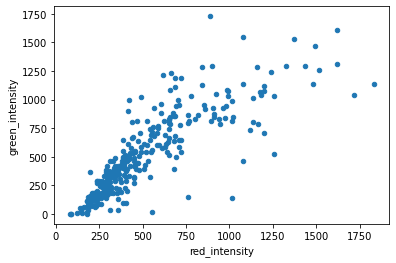

In [9]:
data_props.plot(x="red_intensity", y="green_intensity", kind="scatter")

array([[<AxesSubplot:title={'center':'red_intensity'}>]], dtype=object)

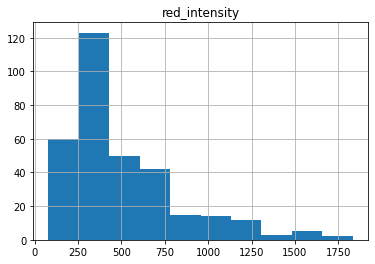

In [10]:
data_props.hist(column="red_intensity")

array([[<AxesSubplot:title={'center':'green_intensity'}>]], dtype=object)

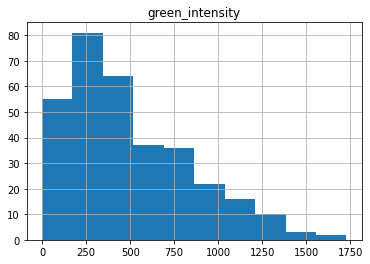

In [11]:
data_props.hist(column="green_intensity")

In [12]:
v = Viewer()

/home/aaristov/miniconda3/envs/griottes/lib/python3.9/site-packages/napari_tools_menu/__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


In [14]:
v.add_image(
    data, 
    channel_axis=1, 
    name=["red","green","dapi","labels"],
    colormap=["red","green","blue","gray"]
)

[<Image layer 'red' at 0x7f027b953550>,
 <Image layer 'green' at 0x7f02cae97700>,
 <Image layer 'dapi' at 0x7f027a9f3eb0>,
 <Image layer 'labels' at 0x7f027a711e20>]